In [1]:
import os
from os.path import dirname, basename, isfile, join
from collections import Counter

import matplotlib.pyplot as plt

from SeqUtils import seq_utils

In [2]:
SCRATCH = os.environ['SCRATCH']

In [3]:
re_data = seq_utils.read_fasta(join(SCRATCH, 'data', 'REBASE', 'All_Type_II_restriction_enzyme_genes_Protein.txt'), "pandas")

In [4]:
def get_cut_site(description: str):
    vals = description.split()
    for v in vals[1:]:
        if set(v).difference(set("ATCG")) == set():
            return v

In [5]:
re_data["cut_site"] = re_data.Description.apply(get_cut_site)
re_data["cut_site_length"] = re_data["cut_site"].str.len()
re_data["protein_length"] = re_data.Sequence.apply(lambda x: len(x))

In [6]:
re_data = re_data.dropna()
re_data = re_data.drop_duplicates(["Sequence","cut_site"])
cut_site_abundance = re_data["cut_site"].value_counts().to_dict()
re_data["cut_site_abundance"] = re_data.cut_site.map(cut_site_abundance)
re_data["seq"] = [str(i) for i in re_data.Sequence.values]


In [ ]:
re_data

: 

In [127]:
re_data.groupby("Sequence").agg(list)["cut_site"].apply(lambda x: len(x))

Sequence
(A, D, D, N, M, G, F, D, N, L, D, F, A, K, I, D, E, D, R, I, V, D, Y, T, N, F, G, E, A, T, G, L, L, D, F, L, Q, K, K, A, N, R, S, L, V, D, Y, V, Y, G, V, E, A, G, L, D, S, N, A, R, K, N, R, S, G, T, T, M, E, G, I, L, E, R, T, V, A, R, V, C, K, E, Y, G, L, E, F, K, A, Q, A, T, A, P, F, I, K, D, N, W, ...)    1
(A, I, W, S, M, G, P, L, E, S, T, C, R, H, A, S, L, K, F, D, V, D, R, R, Q, A, P, T, T, W, V, N, I, I, I, E, N, A, K, G, R, S, G, G, V, V, E, Q, H, L, V, G, A, K, L, E, R, R, F, R, D, L, S, I, P, N, H, P, A, H, A, G, D, R, Q, T, E, R, A, G, D, F, E, I, S, R, L, V, Y, H, V, T, S, A, P, S, R, N, V, L, ...)    1
(A, L, S, K, W, V, S, P, K, R, T, R, S, Y, P, Y, A, R, V, Y, D, T, F, D, S, G, V, S, K, V, A, T, I, I, P, L, I, K, D, E, G, I, N, G, D, M, D, Y, L, Q, W, D, T, L, S, L, M, S, L, L, N, V, Y, V, I, I, G, F, Y, D, E, A, Q, P, H, L, S, R, I, D, K, I, T, N, Q, H, F, N, N, E, Y, I, L, G, Q, L, T, Q, L, V, ...)    1
(A, L, S, K, W, V, S, P, K, R, T, R, S, Y, P, Y, A, R, V, 

In [ ]:
re_data[re_data.cut_site_length >=6].sort_values("cut_site_abundance", ascending = False)

: 

Text(0, 0.5, 'Frequency')

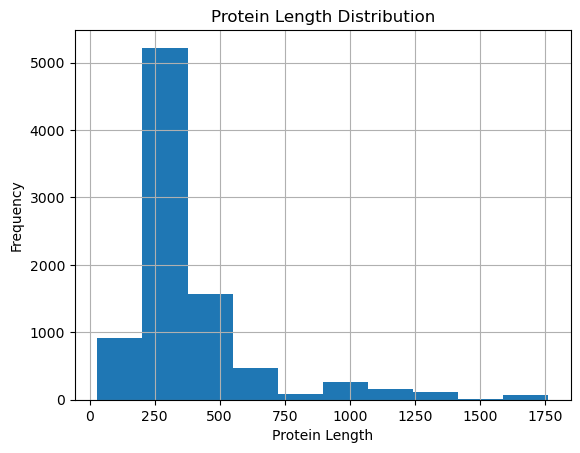

In [8]:
ax = re_data.protein_length.hist()
ax.set_title('Protein Length Distribution')
ax.set_xlabel('Protein Length')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

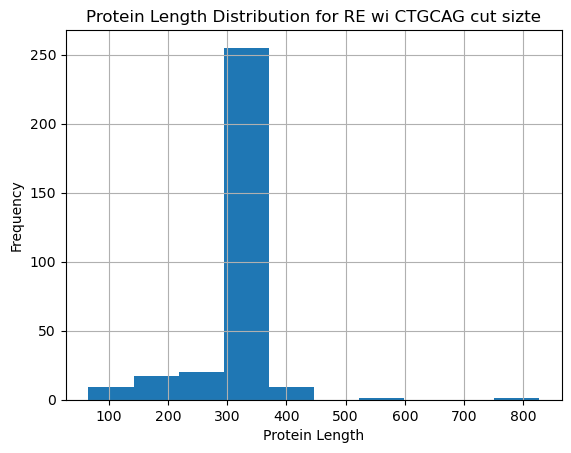

In [11]:
ax = re_data[re_data.cut_site == "CTGCAG"].protein_length.hist()
ax.set_title('Protein Length Distribution for RE wi CTGCAG cut sizte')
ax.set_xlabel('Protein Length')
ax.set_ylabel('Frequency')